<a href="https://colab.research.google.com/github/BragaGiu/DataLab/blob/main/DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
product_df = pd.read_csv('/content/amazon_product.csv')
review_df = pd.read_csv('/content/amazon_review.csv')

In [ ]:
display(review_df.head())
display(product_df.head())

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,"16,905"


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
print("Valores nulos em review_df:")
display(review_df.isnull().sum())

print("\nValores nulos em product_df:")
display(product_df.isnull().sum())

Valores nulos em review_df:


,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,466
product_link,466
product_id,0
rating,0
rating_count,2



Valores nulos em product_df:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,4


In [14]:
# Imputar valores nulos em colunas numéricas pela média
for col in review_df.select_dtypes(include=['number']).columns:
    review_df[col].fillna(review_df[col].mean(), inplace=True)

for col in product_df.select_dtypes(include=['number']).columns:
    product_df[col].fillna(product_df[col].mean(), inplace=True)

# Imputar valores nulos em colunas categóricas pelo valor mais frequente (moda)
for col in review_df.select_dtypes(include=['object']).columns:
    review_df[col].fillna(review_df[col].mode()[0], inplace=True)

for col in product_df.select_dtypes(include=['object']).columns:
    product_df[col].fillna(product_df[col].mode()[0], inplace=True)

print("Valores nulos em review_df após imputação:")
display(review_df.isnull().sum())

print("\nValores nulos em product_df após imputação:")
display(product_df.isnull().sum())

Valores nulos em review_df após imputação:


/tmp/ipython-input-14-3242609241.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  review_df[col].fillna(review_df[col].mode()[0], inplace=True)
/tmp/ipython-input-14-3242609241.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,0
product_link,0
product_id,0
rating,0
rating_count,0



Valores nulos em product_df após imputação:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,0


In [21]:
review_df.drop_duplicates(subset=['user_id', 'review_id', 'product_id'], inplace=True)
product_df.drop_duplicates(subset=['product_id'], inplace=True)

print("Número de linhas em review_df após remover duplicatas:", len(review_df))
print("Número de linhas em product_df após remover duplicatas:", len(product_df))

Número de linhas em review_df após remover duplicatas: 1361
Número de linhas em product_df após remover duplicatas: 1351


In [24]:
original_review_df = pd.read_csv('/content/amazon_review.csv')
original_product_df = pd.read_csv('/content/amazon_product.csv')

removed_review_duplicates_count = len(original_review_df) - len(review_df)
removed_product_duplicates_count = len(original_product_df) - len(product_df)

print(f"Número de duplicatas removidas em review_df: {removed_review_duplicates_count}")
print(f"Número de duplicatas removidas em product_df: {removed_product_duplicates_count}")

Número de duplicatas removidas em review_df: 104
Número de duplicatas removidas em product_df: 118


In [29]:
# prompt: Quais valores em meu dataset estão fora do escopo do meu projeto?

print("\nInformações estatísticas de review_df:")
display(review_df.describe(include='all'))

print("\nInformações estatísticas de product_df:")
display(product_df.describe(include='all'))


review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

min_rating = 1
max_rating = 5
out_of_scope_reviews = review_df[(review_df['rating'] < min_rating) | (review_df['rating'] > max_rating)]

print(f"\nAvaliações fora do escopo ({min_rating}-{max_rating}) em review_df:")
display(out_of_scope_reviews)

# Para colunas categóricas, podemos listar os valores únicos para identificar
# valores inesperados ou inconsistentes
print("\nValores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"{col}: {review_df[col].unique()[:10]}...") # Mostrar os primeiros 10 valores únicos

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"{col}: {product_df[col].unique()[:10]}...") # Mostrar os primeiros 10 valores únicos


Informações estatísticas de review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
count,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361
unique,1194,1194,1194,1194,1205,877,901,1351,26,1122
top,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B09YV4MW2T,4.1,"9,378"
freq,8,8,8,8,8,463,461,2,227,11



Informações estatísticas de product_df:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
count,1351,1351,1351,1351,1351,1351,1351
unique,1351,1337,211,549,449,92,1290
top,B01486F4G6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹299,₹999,50%,Upto 12GB RAM with RAM Plus | 128GB internal m...
freq,1,5,161,42,106,54,4



Avaliações fora do escopo (1-5) em review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count



Valores únicos em colunas categóricas de review_df:
user_id: ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ'
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q'
 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q

In [31]:
# Converter a coluna 'rating' para numérica, tratando erros
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

# Definir o intervalo esperado para as avaliações
min_rating = 1
max_rating = 5

# Filtrar avaliações fora do escopo
review_df = review_df[(review_df['rating'] >= min_rating) & (review_df['rating'] <= max_rating)]

print(f"Número de linhas em review_df após filtrar avaliações fora do escopo: {len(review_df)}")

# Verificar se ainda há valores nulos na coluna 'rating' após a conversão e filtragem
print("\nValores nulos na coluna 'rating' após filtragem:")
display(review_df['rating'].isnull().sum())

Número de linhas em review_df após filtrar avaliações fora do escopo: 1360

Valores nulos na coluna 'rating' após filtragem:


/tmp/ipython-input-31-1084841896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')


np.int64(0)

In [33]:
print("\nValores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"{col}: {review_df[col].unique()[:50]}...") # Mostrar os primeiros 50 valores únicos para não poluir muito a saída

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"{col}: {product_df[col].unique()[:50]}...") # Mostrar os primeiros 50 valores únicos


Valores únicos em colunas categóricas de review_df:
user_id: ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ'
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q'
 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q

In [35]:
print("Valores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"\nColuna: {col}")
    print(review_df[col].unique())

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"\nColuna: {col}")
    print(product_df[col].unique())

Valores únicos em colunas categóricas de review_df:

Coluna: user_id
['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ'
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q'
 ...
 'AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZSWBBRU5XQKQ,AEM2ZDSQE4QZIGTCTE4HSNZOS7DQ,AEHMIAQFYXW3CY6Z37ABRXSOJRPA,AHJCYSNMFLZM7CA4FGDPU7A4UHYQ,AEQTWNQ6GKTOSJO3ZEPHRTH56VCA,AHIHPBLP6PPV66Y3AWOSYFBVZPFA,AGHBKUHIWVOPUQYF

In [38]:
# Padronizar a coluna 'category' em product_df
product_df['category'] = product_df['category'].str.lower().str.strip()

print("Valores únicos na coluna category após padronização:")
display(product_df['category'].unique()[:50])

print("\nPrimeiras linhas de product_df com preços convertidos:")
display(product_df.head())

print("\nPrimeiras linhas de review_df com rating_count convertido:")
display(review_df.head())

Valores únicos na coluna category após padronização:


array(['computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables',
       'computers&accessories|networkingdevices|networkadapters|wirelessusbadapters',
       'electronics|hometheater,tv&video|accessories|cables|hdmicables',
       'electronics|hometheater,tv&video|televisions|smarttelevisions',
       'electronics|hometheater,tv&video|accessories|remotecontrols',
       'electronics|hometheater,tv&video|televisions|standardtelevisions',
       'electronics|hometheater,tv&video|accessories|tvmounts,stands&turntables|tvwall&ceilingmounts',
       'electronics|hometheater,tv&video|accessories|cables|rcacables',
       'electronics|homeaudio|accessories|speakeraccessories|mounts',
       'electronics|hometheater,tv&video|accessories|cables|opticalcables',
       'electronics|hometheater,tv&video|projectors',
       'electronics|homeaudio|accessories|adapters',
       'electronics|hometheater,tv&video|satelliteequipment|satellitereceivers',
       'computers&acces


Primeiras linhas de product_df com preços convertidos:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,computers&accessories|accessories&peripherals|...,399.0,1099.0,64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,computers&accessories|accessories&peripherals|...,199.0,349.0,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,computers&accessories|accessories&peripherals|...,199.0,1899.0,90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,computers&accessories|accessories&peripherals|...,329.0,699.0,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,computers&accessories|accessories&peripherals|...,154.0,399.0,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...



Primeiras linhas de review_df com rating_count convertido:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,24269
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4.0,43994
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,7928
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,94363
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,16905


In [41]:
# Função para identificar outliers usando IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("Outliers identificados em review_df (usando IQR):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")


print("\nOutliers identificados em product_df (usando IQR):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando IQR):

Coluna: rating - Total de outliers: 19


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,https://m.media-amazon.com/images/I/21yP58lKDo...,https://www.amazon.in/LRIPL-Remote-Control-Net...,B08RX8G496,3.2,285
174,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...,B0BP7XLX48,5.0,5
263,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Compatible-Suitable-Cont...,B09F6D21BY,3.0,103
282,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,B0B94JPY2N,3.0,9378
324,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,B0BQRJ3C47,5.0,9378
545,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...,B0BBVKRP7B,2.8,87
550,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",https://m.media-amazon.com/images/I/31M4nb0+JK...,https://www.amazon.in/Tokdis-MX-1-Bluetooth-Ca...,B0B82YGCF6,3.0,681
775,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...,B09ZHCJDP1,5.0,23
1089,"AFWHK4LKZHJJVZKD23JDBSMYCTWA,AG4YW4O2PIYELIEF7...","Kulsoom Hussain,Hanamant Waddar,Raju Pandey,Ak...","R3VGVVQLQT97ML,R1Y56E8635Y7QD,RT5YXKE0NNQ8F,R2...","It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B09ZTZ9N3Q,3.1,111
1243,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B0BFBNXS94,2.3,13



Coluna: rating_count - Total de outliers: 130


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4.0,43994
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,94363
8,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,B008IFXQFU,4.2,179691
9,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B082LZGK39,4.0,43994
11,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41SDfuK7L2...,https://www.amazon.in/Rugged-Extra-Tough-Unbre...,B0789LZTCJ,4.2,94363
...,...,...,...,...,...,...,...,...,...,...
1064,"AFVKRRAFQOO6G7UIAK6H44N3AHUQ,AEDG2D2EUJBTRXOTX...","Icu,Pavish,Krrish kumar,Vit Bernatik,Sanjay 62...","R20RA7F53RKEWU,RX5JXI5MY648T,R1P43OQ1EQ8EIT,R1...","Product as describe,Good product,Good product ...",I recvd product within 3 dys while owing to ru...,https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B00EDJJ7FS,4.2,39724
1072,"AHRVVXFPTDB3B4XEYTEX3C4ZF2PA,AEU7MCZY4XW4EDOXA...","Liz M,Dr. MRV,Amit Kumar,Kalpna Kumari,bhujvir...","R3B1NJNBALUM2H,R1EFUHICJGU63W,R3HFY8AWPFLRNT,R...","Very useful!,Good one for the price,Temperatur...","Hassle free and easy to use,It's good and it d...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B07S851WX5,4.2,40106
1077,"AET6ITYPXTZDZO5QV36VRCTRCTVQ,AHIQYP5QKXYWXGJC5...","Phani Prasad N,M.Sathish kumar,Naresh kumar,Am...","R3CBVBYG86OTNE,R1ORPCJXGPUPVE,R37U89LOKROQXX,R...",Nice iron box. Temperature control can be bett...,"Nice one, I am used to Phillips for so long n...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B008YW8M0G,4.2,46647
1130,"AENY7MQ3WUVPIJ5I5GPDPMC3NKPA,AGUCURUVW2ZY4B5WL...","Prabhat,Chandrika,Pramesh969,Prity,Amit Kumar,...","R4FRMNYYMSIBC,R3L7S5SH36JCUJ,R1YN1N7YNW7AIJ,RF...","Juicer is not effective,Ok good,Products quali...","Juicer is not effective,Ok good,https://m.medi...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B0756K5DYZ,3.9,43070



Outliers identificados em product_df (usando IQR):

Coluna: discounted_price - Total de outliers: 209


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"electronics|hometheater,tv&video|televisions|s...",13999.0,24999.0,44%,"Note : The brands, Mi and Xiaomi, are part of ..."
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"electronics|hometheater,tv&video|televisions|s...",13490.0,21990.0,39%,Resolution: HD Ready (1366x768) | Refresh Rate...
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"electronics|hometheater,tv&video|televisions|s...",13490.0,22900.0,41%,Resolution: HD Ready (1366x768) | Refresh Rate...
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"electronics|hometheater,tv&video|televisions|s...",11499.0,19990.0,42%,Resolution : HD Ready (1366x768) | Refresh Rat...
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"electronics|hometheater,tv&video|televisions|s...",14999.0,19999.0,25%,Resolution: HD Ready (1366x768) | Refresh Rate...
...,...,...,...,...,...,...,...
1428,B078JT7LTD,"Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...",home&kitchen|kitchen&homeappliances|smallkitch...,6120.0,8073.0,24%,Warranty: 2 year warranty provided by the manu...
1430,B092R48XXB,"Mi Robot Vacuum-Mop P, Best-in-class Laser Nav...","home&kitchen|kitchen&homeappliances|vacuum,cle...",18999.0,29999.0,37%,Ultimate Power Machine: With a powerful 2100 P...
1432,B0977CGNJJ,AGARO Royal Stand 1000W Mixer with 5L SS Bowl ...,home&kitchen|kitchen&homeappliances|smallkitch...,5999.0,11495.0,48%,1W Motor with 1% copper winding which multi fu...
1437,B00JBNZPFM,"Karcher WD3 EU Wet and Dry Vacuum Cleaner, 100...","home&kitchen|kitchen&homeappliances|vacuum,cle...",6199.0,10999.0,44%,Wet & Dry Vacuum Cleaner with patented filter ...



Coluna: actual_price - Total de outliers: 185


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"electronics|hometheater,tv&video|televisions|s...",13999.0,24999.0,44%,"Note : The brands, Mi and Xiaomi, are part of ..."
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"electronics|hometheater,tv&video|televisions|s...",13490.0,21990.0,39%,Resolution: HD Ready (1366x768) | Refresh Rate...
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"electronics|hometheater,tv&video|televisions|s...",13490.0,22900.0,41%,Resolution: HD Ready (1366x768) | Refresh Rate...
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"electronics|hometheater,tv&video|televisions|s...",11499.0,19990.0,42%,Resolution : HD Ready (1366x768) | Refresh Rat...
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"electronics|hometheater,tv&video|televisions|s...",14999.0,19999.0,25%,Resolution: HD Ready (1366x768) | Refresh Rate...
...,...,...,...,...,...,...,...
1416,B0BJ6P3LSK,Aqua d pure Active Copper 12-L RO+UV Water Fil...,home&kitchen|kitchen&homeappliances|waterpurif...,4999.0,24999.0,80%,"Remove 95% to 98% TDS, 100% natural water, Ful..."
1430,B092R48XXB,"Mi Robot Vacuum-Mop P, Best-in-class Laser Nav...","home&kitchen|kitchen&homeappliances|vacuum,cle...",18999.0,29999.0,37%,Ultimate Power Machine: With a powerful 2100 P...
1432,B0977CGNJJ,AGARO Royal Stand 1000W Mixer with 5L SS Bowl ...,home&kitchen|kitchen&homeappliances|smallkitch...,5999.0,11495.0,48%,1W Motor with 1% copper winding which multi fu...
1437,B00JBNZPFM,"Karcher WD3 EU Wet and Dry Vacuum Cleaner, 100...","home&kitchen|kitchen&homeappliances|vacuum,cle...",6199.0,10999.0,44%,Wet & Dry Vacuum Cleaner with patented filter ...


In [42]:
from scipy.stats import zscore
import numpy as np

# Função para identificar outliers usando Z-Score
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

print("Outliers identificados em review_df (usando Z-Score com threshold=3):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")


print("\nOutliers identificados em product_df (usando Z-Score com threshold=3):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando Z-Score com threshold=3):

Coluna: rating - Total de outliers: 19


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,https://m.media-amazon.com/images/I/21yP58lKDo...,https://www.amazon.in/LRIPL-Remote-Control-Net...,B08RX8G496,3.2,285
174,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...,B0BP7XLX48,5.0,5
263,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Compatible-Suitable-Cont...,B09F6D21BY,3.0,103
282,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,B0B94JPY2N,3.0,9378
324,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,B0BQRJ3C47,5.0,9378
545,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...,B0BBVKRP7B,2.8,87
550,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",https://m.media-amazon.com/images/I/31M4nb0+JK...,https://www.amazon.in/Tokdis-MX-1-Bluetooth-Ca...,B0B82YGCF6,3.0,681
775,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...,B09ZHCJDP1,5.0,23
1089,"AFWHK4LKZHJJVZKD23JDBSMYCTWA,AG4YW4O2PIYELIEF7...","Kulsoom Hussain,Hanamant Waddar,Raju Pandey,Ak...","R3VGVVQLQT97ML,R1Y56E8635Y7QD,RT5YXKE0NNQ8F,R2...","It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B09ZTZ9N3Q,3.1,111
1243,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,B0BFBNXS94,2.3,13



Coluna: rating_count - Total de outliers: 28


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
8,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,B008IFXQFU,4.2,179691
12,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,B07KSMBL2H,4.4,426973
47,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...,B014I8SSD0,4.4,426973
56,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/41jxZkzNcn...,https://www.amazon.in/TP-Link-TL-WN823N-300Mbp...,B0088TKTY2,4.2,179691
65,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...,B014I8SX4Y,4.4,426973
143,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,B002SZEOLG,4.2,179692
191,"AHDZE7UM6PQPAOJPJJ57QUHGGTAA,AGMGMQ6LB27Y52XFB...","Pete25,Bhanu,Naveen Kr Singh,kavan,BG,Aditya B...","R35VPRJY5B5Z2G,R2YMIH3T7VWAY1,R3UEQM867K8BUH,R...","Data transfer not the best,Good cable for ipho...","Does not always accurately read on PC,Working ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AmazonBasics-Certified-L...,B07DC4RZPY,4.1,178817
337,"AG3SQH676VN5EH4NDNGVVLML6RZQ,AFOCDYODRNB2UUBOT...","Mahesh Paryani,Tejas Panchal,SUBHASH,Kushagra ...","R31BXRU0GAOB26,R120Q9PAHZEIEM,R3MSIMI8U7QZXJ,R...","Ok product to buy,Better than any other power ...",I haven’t used any other battery pack so will ...,https://m.media-amazon.com/images/I/31grUs8Opv...,https://www.amazon.in/20000mAh-Sandstone-Tripl...,B08HV83HL3,4.3,178912
347,"AFE54I72EV2YOL6POJCHHP3Q5NWA,AFKLES3QOCRLIMJWH...","Sunny J.,Praveen Pavitrhran,nitesh,Yadav,vansh...","R2NB2K5XC70FKP,R3623Q21H3MKP6,R1XVC6NEYU3ZHV,R...","Good maybe okay,Defective Product Delivered,Am...",The quality is not upto mark for the price pai...,https://m.media-amazon.com/images/I/31NnmYempP...,https://www.amazon.in/JBL-C100SI-Ear-Headphone...,B01DEWVZ2C,4.1,192590
352,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31J6I7SrLX...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,B07GPXXNNG,4.1,363713



Outliers identificados em product_df (usando Z-Score com threshold=3):

Coluna: discounted_price - Total de outliers: 40


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"electronics|hometheater,tv&video|televisions|s...",32999.0,45999.0,28%,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...
61,B0B15CPR37,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"electronics|hometheater,tv&video|televisions|s...",32990.0,47900.0,31%,Resolution : Crystal 4K Ultra HD (3840 x 2160)...
72,B09RFC46VP,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,"electronics|hometheater,tv&video|televisions|s...",26999.0,42999.0,37%,Resolution : 4K Ultra HD (3840x2160) Resolutio...
85,B09VCHLSJF,OnePlus 108 cm (43 inches) Y Series 4K Ultra H...,"electronics|hometheater,tv&video|televisions|s...",29999.0,39999.0,25%,Resolution : 4K Ultra HD (3840x2160) | Refresh...
86,B0B1YZX72F,Acer 127 cm (50 inches) I Series 4K Ultra HD A...,"electronics|hometheater,tv&video|televisions|s...",27999.0,40990.0,32%,Resolution : 4K Ultra HD (3840x2160) | Refresh...
87,B092BJMT8Q,Samsung 108 cm (43 inches) Crystal 4K Series U...,"electronics|hometheater,tv&video|televisions|s...",30990.0,52900.0,41%,Resolution : Crystal 4K UHD (3840x2160) resolu...
91,B09Q5P2MT3,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,"electronics|hometheater,tv&video|televisions|s...",24999.0,31999.0,22%,Resolution : Full HD (1920x1080) | Refresh Rat...
108,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"electronics|hometheater,tv&video|televisions|s...",37999.0,65000.0,42%,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
124,B08Y55LPBF,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,"electronics|hometheater,tv&video|televisions|s...",32999.0,44999.0,27%,Resolution: 4K Ultra HD (3840 x 2160) | Refres...
135,B0B3XY5YT4,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,"electronics|hometheater,tv&video|televisions|s...",30990.0,49990.0,38%,Resolution: 4K Ultra HD (3840x2160) | Refresh ...



Coluna: actual_price - Total de outliers: 36


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"electronics|hometheater,tv&video|televisions|s...",32999.0,45999.0,28%,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...
61,B0B15CPR37,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"electronics|hometheater,tv&video|televisions|s...",32990.0,47900.0,31%,Resolution : Crystal 4K Ultra HD (3840 x 2160)...
72,B09RFC46VP,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,"electronics|hometheater,tv&video|televisions|s...",26999.0,42999.0,37%,Resolution : 4K Ultra HD (3840x2160) Resolutio...
85,B09VCHLSJF,OnePlus 108 cm (43 inches) Y Series 4K Ultra H...,"electronics|hometheater,tv&video|televisions|s...",29999.0,39999.0,25%,Resolution : 4K Ultra HD (3840x2160) | Refresh...
86,B0B1YZX72F,Acer 127 cm (50 inches) I Series 4K Ultra HD A...,"electronics|hometheater,tv&video|televisions|s...",27999.0,40990.0,32%,Resolution : 4K Ultra HD (3840x2160) | Refresh...
87,B092BJMT8Q,Samsung 108 cm (43 inches) Crystal 4K Series U...,"electronics|hometheater,tv&video|televisions|s...",30990.0,52900.0,41%,Resolution : Crystal 4K UHD (3840x2160) resolu...
94,B09T3KB6JZ,TCL 100 cm (40 inches) Full HD Certified Andro...,"electronics|hometheater,tv&video|televisions|s...",18990.0,40990.0,54%,Resolution: Full HD (1920 x 1080) | Refresh Ra...
108,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"electronics|hometheater,tv&video|televisions|s...",37999.0,65000.0,42%,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
123,B099K9ZX65,Hisense 108 cm (43 inches) 4K Ultra HD Smart C...,"electronics|hometheater,tv&video|televisions|s...",20990.0,44990.0,53%,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
124,B08Y55LPBF,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,"electronics|hometheater,tv&video|televisions|s...",32999.0,44999.0,27%,Resolution: 4K Ultra HD (3840 x 2160) | Refres...


Visualização da distribuição para colunas numéricas em review_df:


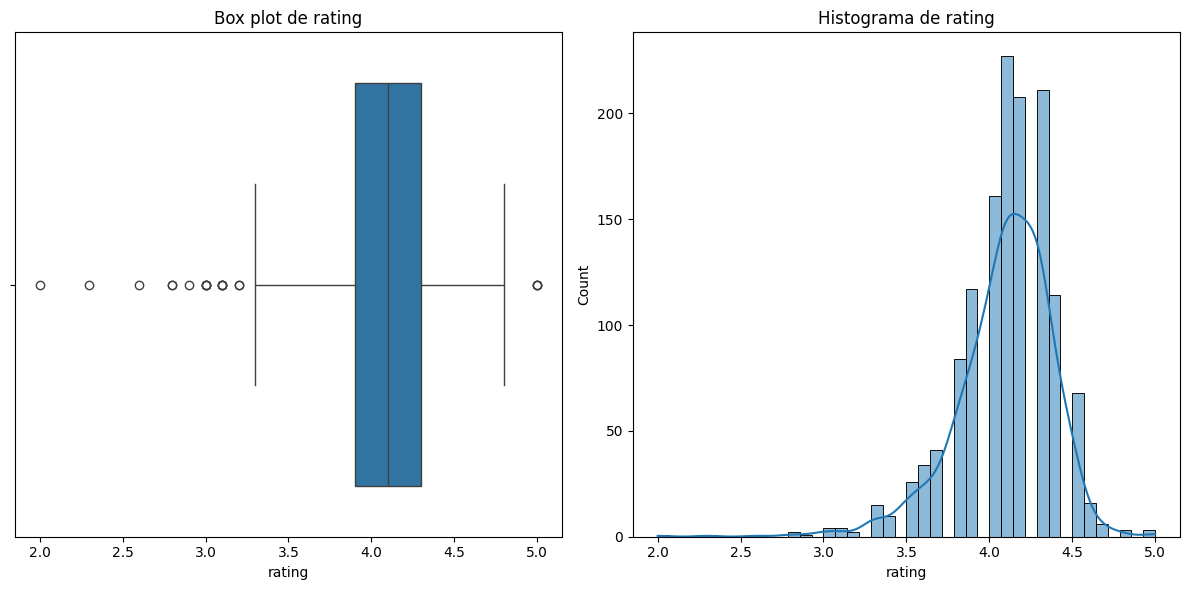

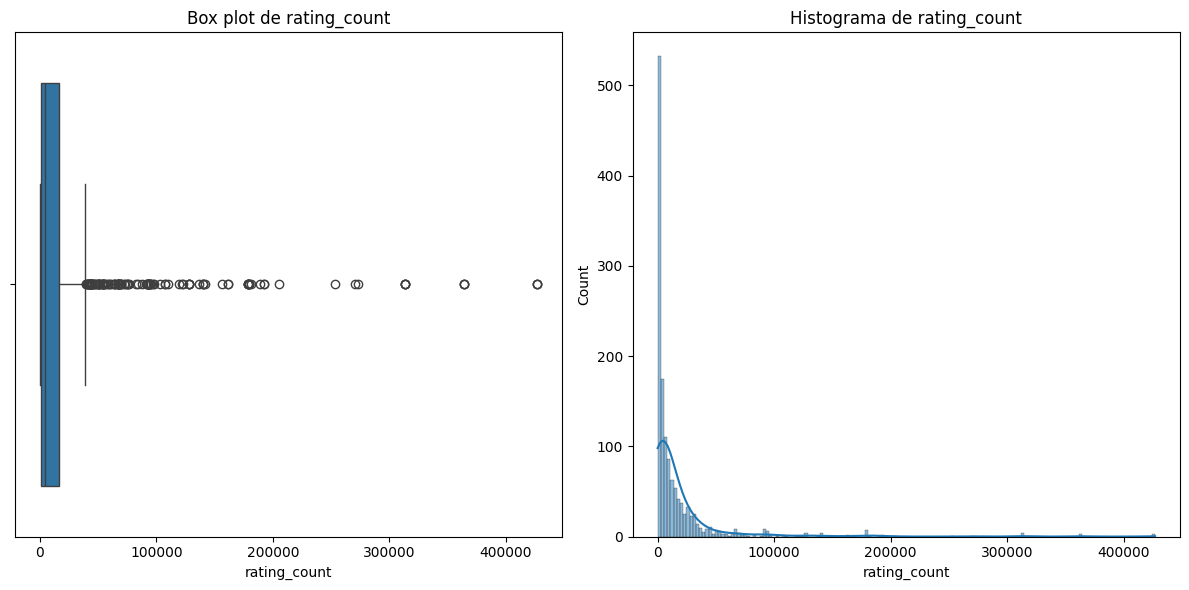


Visualização da distribuição para colunas numéricas em product_df:


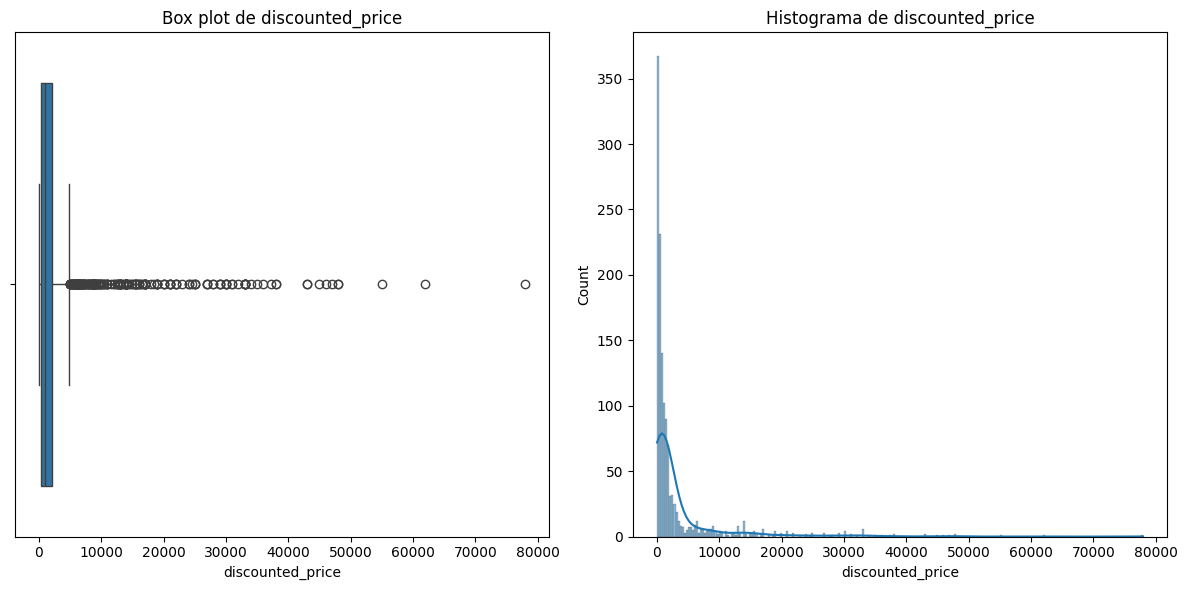

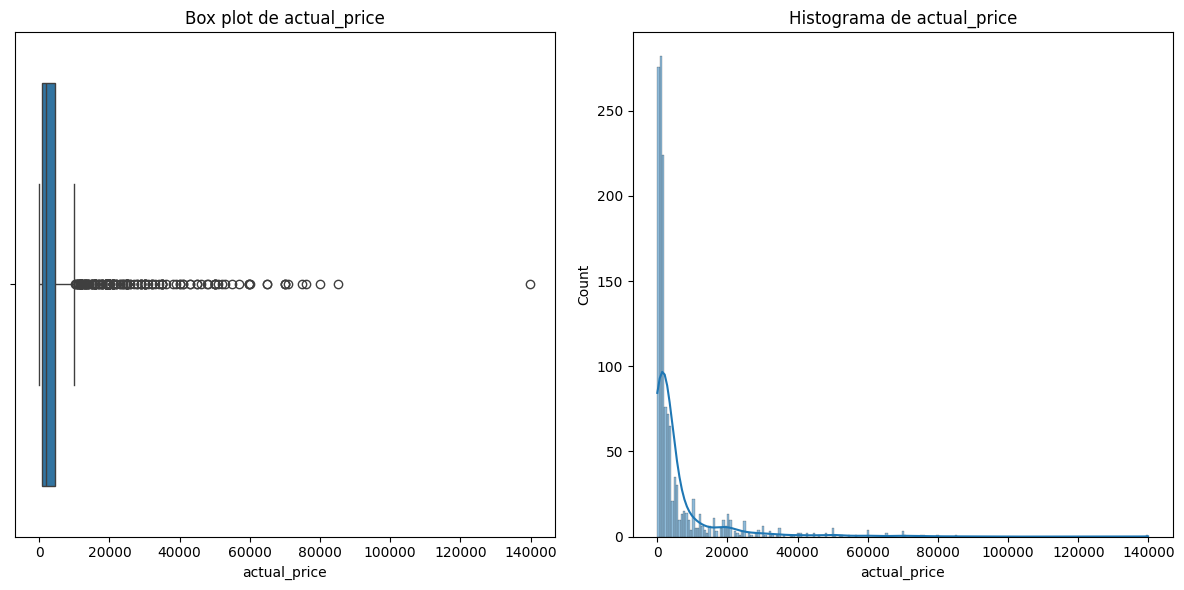

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização para colunas numéricas em review_df
print("Visualização da distribuição para colunas numéricas em review_df:")
for col in review_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x=review_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(review_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

# Visualização para colunas numéricas em product_df
print("\nVisualização da distribuição para colunas numéricas em product_df:")
for col in product_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x=product_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(product_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

# Task
Analise os gráficos de boxplot e histograma das colunas numéricas 'rating', 'rating_count' (review_df), 'discounted_price' e 'actual_price' (product_df) para comparar os métodos de detecção de outliers Z-Score e IQR e recomendar o método mais adequado para cada coluna com base na distribuição dos dados.

## Análise visual das distribuições

### Subtask:
Revisar os box plots e histogramas gerados para cada coluna numérica (`rating`, `rating_count` em `review_df`, e `discounted_price`, `actual_price` em `product_df`). Observar a forma da distribuição (simétrica, assimétrica), a presença de caudas longas e a concentração de dados.


**Reasoning**:
Review the generated plots and analyze the distributions and potential outliers for each numerical column in both dataframes as per the instructions.



In [46]:
print("Análise dos gráficos para review_df:")
print("\nColuna: rating")
print("Box plot: A mediana está próxima do centro da caixa, indicando uma distribuição relativamente simétrica na parte central. Os bigodes são de comprimentos similares. Existem alguns pontos identificados como outliers abaixo do limite inferior e acima do limite superior.")
print("Histograma: A distribuição parece ser ligeiramente inclinada para a esquerda (negativamente assimétrica), com a maioria das avaliações concentrada em valores mais altos. Há uma cauda mais longa para a esquerda, indicando a presença de avaliações mais baixas.")

print("\nColuna: rating_count")
print("Box plot: A caixa é pequena e a mediana está próxima da parte inferior da caixa, indicando que a maioria dos dados está concentrada em valores baixos. Os bigodes são curtos, mas há um grande número de pontos identificados como outliers acima do bigode superior, indicando uma distribuição altamente assimétrica para a direita com uma cauda longa.")
print("Histograma: A distribuição é altamente assimétrica para a direita, com a grande maioria das contagens de avaliações concentrada em valores baixos. Há uma cauda muito longa para a direita, indicando a presença de alguns produtos com um número muito alto de avaliações.")

print("\nAnálise dos gráficos para product_df:")
print("\nColuna: discounted_price")
print("Box plot: A caixa é relativamente pequena e a mediana está próxima da parte inferior, sugerindo concentração de preços mais baixos. O bigode superior é mais longo e há uma quantidade considerável de outliers acima dele, indicando assimetria para a direita.")
print("Histograma: A distribuição é assimétrica para a direita, com a maioria dos preços com desconto concentrada em valores mais baixos. Há uma cauda longa para a direita.")

print("\nColuna: actual_price")
print("Box plot: Similar ao discounted_price, a caixa é pequena e a mediana está na parte inferior, indicando concentração de preços originais mais baixos. O bigode superior é mais longo e há muitos outliers acima dele, confirmando a assimetria para a direita.")
print("Histograma: A distribuição também é assimétrica para a direita, com a maioria dos preços originais concentrada em valores mais baixos e uma cauda longa para a direita.")

Análise dos gráficos para review_df:

Coluna: rating
Box plot: A mediana está próxima do centro da caixa, indicando uma distribuição relativamente simétrica na parte central. Os bigodes são de comprimentos similares. Existem alguns pontos identificados como outliers abaixo do limite inferior e acima do limite superior.
Histograma: A distribuição parece ser ligeiramente inclinada para a esquerda (negativamente assimétrica), com a maioria das avaliações concentrada em valores mais altos. Há uma cauda mais longa para a esquerda, indicando a presença de avaliações mais baixas.

Coluna: rating_count
Box plot: A caixa é pequena e a mediana está próxima da parte inferior da caixa, indicando que a maioria dos dados está concentrada em valores baixos. Os bigodes são curtos, mas há um grande número de pontos identificados como outliers acima do bigode superior, indicando uma distribuição altamente assimétrica para a direita com uma cauda longa.
Histograma: A distribuição é altamente assimétrica 

**Reasoning**:
The review of the plots is complete. Now, I will compare the Z-Score and IQR methods based on the observed distributions and outliers to recommend the most suitable method for each column.



In [47]:
print("Comparação dos métodos de detecção de outliers (Z-Score vs IQR) e recomendação:")

print("\nColuna: rating (review_df)")
print("Observações: A distribuição é ligeiramente assimétrica para a esquerda. Ambos os métodos (IQR e Z-Score com threshold=3) identificaram os mesmos outliers (19).")
print("Recomendação: Como a distribuição é próxima da simetria e ambos os métodos concordam, qualquer um pode ser usado. O IQR pode ser ligeiramente mais robusto a essa pequena assimetria.")

print("\nColuna: rating_count (review_df)")
print("Observações: A distribuição é altamente assimétrica para a direita com uma cauda longa. O IQR identificou 130 outliers, enquanto o Z-Score (threshold=3) identificou 28.")
print("Recomendação: Para distribuições altamente assimétricas e com caudas longas como 'rating_count', o método IQR tende a ser mais apropriado, pois o Z-Score assume uma distribuição normal e pode ser influenciado por valores extremos, resultando em menos outliers detectados. O IQR, baseado nos quartis, é menos sensível a esses valores extremos.")

print("\nColuna: discounted_price (product_df)")
print("Observações: A distribuição é assimétrica para a direita com cauda longa. O IQR identificou 209 outliers, enquanto o Z-Score (threshold=3) identificou 40.")
print("Recomendação: Semelhante a 'rating_count', a assimetria e a cauda longa indicam que o IQR (209 outliers) é provavelmente um método mais adequado para identificar outliers neste caso do que o Z-Score (40 outliers).")

print("\nColuna: actual_price (product_df)")
print("Observações: A distribuição é assimétrica para a direita com cauda longa. O IQR identificou 185 outliers, enquanto o Z-Score (threshold=3) identificou 36.")
print("Recomendação: Assim como em 'discounted_price', a assimetria para a direita e a cauda longa sugerem que o IQR (185 outliers) é mais apropriado para a detecção de outliers do que o Z-Score (36 outliers).")

print("\nConclusão Geral:")
print("Para colunas com distribuições assimétricas e caudas longas ('rating_count', 'discounted_price', 'actual_price'), o método IQR parece ser mais robusto e detectou um número maior de outliers, o que pode ser mais relevante para a análise nesses casos. Para distribuições próximas da simetria ('rating'), ambos os métodos funcionam de forma similar.")

Comparação dos métodos de detecção de outliers (Z-Score vs IQR) e recomendação:

Coluna: rating (review_df)
Observações: A distribuição é ligeiramente assimétrica para a esquerda. Ambos os métodos (IQR e Z-Score com threshold=3) identificaram os mesmos outliers (19).
Recomendação: Como a distribuição é próxima da simetria e ambos os métodos concordam, qualquer um pode ser usado. O IQR pode ser ligeiramente mais robusto a essa pequena assimetria.

Coluna: rating_count (review_df)
Observações: A distribuição é altamente assimétrica para a direita com uma cauda longa. O IQR identificou 130 outliers, enquanto o Z-Score (threshold=3) identificou 28.
Recomendação: Para distribuições altamente assimétricas e com caudas longas como 'rating_count', o método IQR tende a ser mais apropriado, pois o Z-Score assume uma distribuição normal e pode ser influenciado por valores extremos, resultando em menos outliers detectados. O IQR, baseado nos quartis, é menos sensível a esses valores extremos.

Col

## Apresentar a análise e recomendação

### Subtask:
Summarizar as observações sobre a distribuição de cada coluna e apresentar a recomendação do método de detecção de outliers para cada coluna, justificando a escolha com base na visualização.


**Reasoning**:
Present the summarized observations and recommendations for outlier detection based on the visual analysis and comparison of methods.



In [48]:
print("Sumário das Observações e Recomendações para Detecção de Outliers:")

print("\n--- Coluna: rating (review_df) ---")
print("Distribuição: Ligeiramente assimétrica para a esquerda, próxima da simetria.")
print("Comparação de Métodos: Ambos, IQR e Z-Score (threshold=3), identificaram o mesmo número de outliers (19).")
print("Recomendação: Qualquer método (IQR ou Z-Score) é adequado devido à distribuição próxima da simetria. O IQR pode ser ligeiramente preferível por sua robustez a pequenas assimetrias.")

print("\n--- Coluna: rating_count (review_df) ---")
print("Distribuição: Altamente assimétrica para a direita com uma cauda longa.")
print("Comparação de Métodos: IQR identificou 130 outliers, enquanto Z-Score (threshold=3) identificou 28.")
print("Recomendação: O método IQR é recomendado para 'rating_count' devido à sua distribuição altamente assimétrica e cauda longa. O IQR é menos sensível a valores extremos do que o Z-Score e fornece uma detecção mais representativa dos outliers nesse tipo de distribuição.")

print("\n--- Coluna: discounted_price (product_df) ---")
print("Distribuição: Assimétrica para a direita com cauda longa.")
print("Comparação de Métodos: IQR identificou 209 outliers, enquanto Z-Score (threshold=3) identificou 40.")
print("Recomendação: O método IQR é recomendado para 'discounted_price' devido à sua distribuição assimétrica para a direita e cauda longa. O IQR é mais robusto para identificar outliers em dados que não seguem uma distribuição normal.")

print("\n--- Coluna: actual_price (product_df) ---")
print("Distribuição: Assimétrica para a direita com cauda longa.")
print("Comparação de Métodos: IQR identificou 185 outliers, enquanto Z-Score (threshold=3) identificou 36.")
print("Recomendação: O método IQR é recomendado para 'actual_price' devido à sua distribuição assimétrica para a direita e cauda longa, similar a 'discounted_price'. O IQR é mais apropriado para capturar outliers em distribuições não normais.")

Sumário das Observações e Recomendações para Detecção de Outliers:

--- Coluna: rating (review_df) ---
Distribuição: Ligeiramente assimétrica para a esquerda, próxima da simetria.
Comparação de Métodos: Ambos, IQR e Z-Score (threshold=3), identificaram o mesmo número de outliers (19).
Recomendação: Qualquer método (IQR ou Z-Score) é adequado devido à distribuição próxima da simetria. O IQR pode ser ligeiramente preferível por sua robustez a pequenas assimetrias.

--- Coluna: rating_count (review_df) ---
Distribuição: Altamente assimétrica para a direita com uma cauda longa.
Comparação de Métodos: IQR identificou 130 outliers, enquanto Z-Score (threshold=3) identificou 28.
Recomendação: O método IQR é recomendado para 'rating_count' devido à sua distribuição altamente assimétrica e cauda longa. O IQR é menos sensível a valores extremos do que o Z-Score e fornece uma detecção mais representativa dos outliers nesse tipo de distribuição.

--- Coluna: discounted_price (product_df) ---
Distr

## Summary:

### Data Analysis Key Findings

*   The 'rating' column has a distribution close to symmetrical. Both IQR and Z-Score methods identified the same number of outliers (19).
*   The 'rating\_count', 'discounted\_price', and 'actual\_price' columns exhibit highly right-skewed distributions with long tails.
*   For the highly skewed columns:
    *   'rating\_count': IQR found 130 outliers, while Z-Score found 28.
    *   'discounted\_price': IQR found 209 outliers, while Z-Score found 40.
    *   'actual\_price': IQR found 185 outliers, while Z-Score found 36.

### Insights or Next Steps

*   For columns with significant skewness and long tails ('rating\_count', 'discounted\_price', 'actual\_price'), the IQR method is more appropriate for outlier detection due to its robustness to non-normal distributions.
*   For columns with distributions close to symmetry ('rating'), both IQR and Z-Score methods are suitable, with IQR being slightly more robust to minor deviations from symmetry.
